                                            CASE STUDY REPORT

This document presents a comprehensive risk assessment of the portfolio at 31.12.2024. It demonstrates the end-to-end quantitative analysis as structured below:


### Report Structure

#### Part A – Data Exploration & Validation  
1. **Section 1:** Data Imports and Initial Setup  
2. **Section 2:** Data Structure, Completeness & Classification  
3. **Section 3:** Data Transformation, Feature Engineering & Validation Controls  
4. **Section 4:** Descriptive Statistics & Outlier Detection  
5. **Section 5:** Categorical Variable Profiling  
6. **Section 6:** Distribution, Correlation & Outlier Diagnostics  

- Part A establishes data quality, uncovers structural insights, and flags anomalies to ensure the integrity of downstream analyses.

#### Part B – Core Risk Metrics & Cash-Flow Modeling  
1. **Section 1:** Key Risk Indicators (KPIs)  
2. **Section 2:** Cash-Flow Projection for Fixed-Coupon Instruments  

- Part B delivers the main analytical outputs: instrument-level KPIs and detailed cash-flow schedules which are crucial for provisioning, capital planning, and liquidity management.

#### Part C – Appendix  
- *All Python codes used in Part B*

## PART A --- Data Exploration & Validation

### Section 1: Data Imports and Initial Setup

#### 1.1 Import Required Libraries

- Imported essential Python libraries for:
  - **Data manipulation:** pandas, numpy
  - **Visualization:** matplotlib.pyplot, seaborn, plotly.express
  - **Statistical analysis:** scipy.stats, statsmodels.api
  - **Display enhancements:** Python.display
  - Suppressed warnings using warnings.filterwarnings('ignore') to improve readability of notebook output.

#### 1.2 Configure Display Settings

- Set pandas display options to:
  - Show all columns: pd.set_option(display.max_columns, None)
  - Format floats: pd.set_option('display.float_format', '{:.2f}'.format)
  - Prevent truncation of long text: pd.set_option('display.max_colwidth', None)

#### 1.3 Load Dataset

- Loaded dataset from a local file:
- **Path:** C:\Users\del\Desktop\Study\portfolio.csv
- Used pd.read_csv() to import the dataset into a DataFrame named df.

#### 1.4 Preview Data

- Displayed the first 5 rows of the dataset to verify successful load and inspect structure.

In [1]:
# Section 1: Data Imports and Initial Setup

# 1.1 Import Required Libraries

# Data manipulation
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Statistical analysis
from scipy import stats
import statsmodels.api as sm

import pandas as pd
from IPython.display import display, HTML


# Suppress warnings to clean up notebook output
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from IPython.display import display, HTML

# 1.2 Configure Display Settings

# Show all columns when displaying DataFrames
pd.set_option('display.max_columns', None)

# Format floating point numbers for readability
pd.set_option('display.float_format', '{:.2f}'.format)

# Prevent truncation of long text columns
pd.set_option('display.max_colwidth', None)


# 1.3 Load Dataset

# Define the path to the dataset
file_path = r'C:\Users\delma\Desktop\Study\portfolio.csv'

# Read the dataset into a pandas DataFrame
df = pd.read_csv(file_path)


# 1.4 Preview Data

# Display the first 5 rows of the DataFrame for initial inspection
df.head(5)

,Position ID,Instrument Type,Coupon Type,Coupon Frequency,Coupon Benchmark,Coupon Margin in bps,Maturity,Business Day Count,Principal Paydown at each payment date,Current Outstanding Value,Trade Date,Settlement Date,Purchase Price,Yield at Purchase %,Book Quote,Current Coupon %,Previous Coupon Date,Next Coupon Date,Market Price,PD,LGD
0,1,Deposits,Floating,1d,ESTR,-25.00,01/01/2025,Actual 360,NaN,1000000.00,31/12/2024,31/12/2024,109.99,0.00,101.44,3.50,31/12/2024,01/01/2025,107.60,0.00,0.84
1,2,Deposits,Fixed,1d,NaN,0.00,01/01/2025,Actual 360,NaN,15000000.00,31/12/2024,31/12/2024,103.71,0.00,99.81,0.00,31/12/2024,01/01/2025,104.28,0.02,0.36
2,3,Deposits,Fixed,1d,NaN,0.00,01/01/2025,Actual 360,NaN,33000000.00,31/12/2024,31/12/2024,97.44,0.00,93.24,0.00,31/12/2024,01/01/2025,91.19,0.01,0.86
3,14,Loan,Fixed,12m,NaN,0.00,27/10/2025,Actual Actual ISDA,NaN,5000000.00,15/08/2017,17/08/2017,101.79,0.72,106.72,1.50,27/10/2024,27/10/2025,98.01,0.02,0.84
4,15,Loan,Fixed,12m,NaN,0.00,18/10/2027,Actual Actual ISDA,NaN,2500000.00,20/10/2017,24/10/2017,99.31,0.96,103.50,1.00,18/10/2024,18/10/2025,96.47,0.01,0.65


## Section 2: Data Structure, Completeness & Classification

**Purpose/Objective**: To Ensure the portfolio dataset is reliable for risk modeling by checking its shape, completeness, and variable types.

### Methodology/Approach
1. **Standardize Columns**: Cleaned names to Title_Case with underscores.  
2. **Summary Metrics**: Counted rows/columns, duplicates, and missing values.  
3. **Column Diagnostics**: Counted unique values, missing entries, and negative values. Inferred each column’s category (`numerical`, `categorical`, `datetime`).

### Summary of Key Findings
- **Size**: 86 records × 21 fields  
- **Duplicates**: 0 (all records unique)  
- **Missing Data**:  3 fields affected; 150 missing cells (8.3% of dataset)  
- **Field Types**:  11 numerical, 7 categorical, 3 datetime  

 **Notable gaps**  
 - Coupon_Benchmark missing in 97.7% (fixed-rate instruments)  
 - Principal_Paydown_At_Each_Payment_Date` missing in 72.1% (likely bullet structures)  
 - Yield_At_Purchase_% has 23 negative values (premium/discount cases)



**Data Overview**

| Metric                | Value |
|-----------------------|-------|
| Total Rows            | 86    |
| Total Columns         | 21    |
| Duplicate Rows        | 0     |
| % Missing Data        | 8.3%  |
| Numerical Fields      | 11    |
| Categorical Fields    | 7     |
| Datetime Fields       | 3     |

**Data Summary Table**

| Variable                                | Unique Values | Missing Count | Missing % | Negative Count | Dtype   | Data Category |
|-----------------------------------------|---------------|---------------|-----------|----------------|---------|---------------|
| Position_Id                             | 86            | 0             | 0.00%     | 0              | int64   | numerical     |
| Instrument_Type                         | 5             | 0             | 0.00%     | 0              | object  | categorical   |
| Coupon_Type                             | 2             | 0             | 0.00%     | 0              | object  | categorical   |
| Coupon_Frequency                        | 5             | 0             | 0.00%     | 0              | object  | categorical   |
| Coupon_Benchmark                        | 2             | 84            | 97.67%    | 0              | object  | categorical   |
| Coupon_Margin_In_Bps                    | 2             | 4             | 4.65%     | 1              | float64 | numerical     |
| Maturity                                | 63            | 0             | 0.00%     | 0              | object  | datetime      |
| Business_Day_Count                      | 4             | 0             | 0.00%     | 0              | object  | categorical   |
| Principal_Paydown_At_Each_Payment_Date | 17            | 62            | 72.09%    | 0              | float64 | numerical     |
| Current_Outstanding_Value               | 28            | 0             | 0.00%     | 0              | float64 | numerical     |
| Trade_Date                              | 61            | 0             | 0.00%     | 0              | object  | datetime      |
| Settlement_Date                         | 63            | 0             | 0.00%     | 0              | object  | datetime      |
| Purchase_Price                          | 85            | 0             | 0.00%     | 0              | float64 | numerical     |
| Yield_At_Purchase_%                     | 49            | 0             | 0.00%     | 23             | float64 | numerical     |
| Book_Quote                              | 84            | 0             | 0.00%     | 0              | float64 | numerical     |
| Current_Coupon_%                        | 38            | 0             | 0.00%     | 4              | float64 | numerical     |
| Previous_Coupon_Date                    | 54            | 0             | 0.00%     | 0              | object  | datetime      |
| Next_Coupon_Date                        | 57            | 0             | 0.00%     | 0              | object  | datetime      |
| Market_Price                            | 86            | 0             | 0.00%     | 0              | float64 | numerical     |
| Pd                                      | 86            | 0             | 0.00%     | 0              | float64 | numerical     |
| Lgd                                     | 86            | 0             | 0.00%     | 0              | float64 | numerical     |

### Interpretation/Implications
- The dataset is **fit for modeling**, with complete coverage of critical risk drivers (Pd, Lgd, dates).  
- **Missing benchmarks** and **paydown schedules** should be validated or documented.  
- Any **negative yields/margins** require review to confirm economic rationale.    

## Section 3: Data Transformation, Feature Engineering & Validation Controls

### Purpose/Objective
Prepare and validate the raw portfolio data for risk modeling by enforcing correct data types, normalizing values, deriving key features, and implementing validation flags.

### Methodology/Approach
1. **Type Conversion**  
   - Cast date fields to datetime.  
   - Cast numeric fields to float.  
2. **Categorical Normalization**  
   - Standardized text columns (Instrument_Type, Coupon_Frequency, etc.) to Title Case.  
3. **Feature Engineering**  
   - Calculated Days_To_Settle (settlement lag).  
4. **Validation Flags**  
   - **Missing Data**: flags for missing dates, numerics, categoricals.  
   - **Logical Checks**: trade after settlement, settlement after maturity, coupon-date order.  
   - **Range Checks**: coupon margins (±1,000 bps), PD/LGD [0,1], prices > 0.  
   - **Uniqueness & Integrity**: duplicate IDs, principal ≤ 0, paydown > outstanding.

### Summary of Key Findings
- **Type Enforcement**: All date and numeric conversions succeeded without mass coercion.  
- **Missing Data Flags**: ~8.3% overall missing; flagged rows isolated for follow-up.  
- **Logical Integrity**:  
  - 0 instances of trade-date or settlement-date violations.  
  - 0 duplicate `Position_Id`.  
- **Range Violations**: None for PD, LGD, or prices; one coupon-margin out of bounds.

### Validation Flag Counts

| Validation Flag             | Count of True |
|-----------------------------|---------------|
| Invalid_Principal           | 0             |
| Trade_After_Settlement      | 0             |
| Settlement_After_Maturity   | 0             |
| Invalid_Coupon_Dates        | 0             |
| Invalid_Coupon_Margin       | 1             |
| Invalid_PD                  | 0             |
| Invalid_LGD                 | 0             |
| Invalid_Prices              | 0             |
| Duplicate_Position_ID       | 0             |
| Invalid_Paydown             | 0             |

### Interpretation/Implications
- The dataset is **technically sound**: no structural or logic errors requiring major remediation.  
- **Missing-data flags** (especially in categoricals) highlight where imputations or validations are needed (e.g., paydown schedules, benchmarks).  
- **Control flags** provide an auditable trail for internal governance and regulator review.  

With these controls in place, the data is fit for risk‐metric calculations and cash flow modeling.  

## Section 4: Descriptive Statistics & Outlier Detection

**Purpose/Objective**: To quantify the central tendency, dispersion, and distribution shape of key numeric risk drivers and identify statistical outliers—so as to inform model calibration, and validation.

#### Methodology/Approach
1. **Variable Selection**: select variables numerical columns except Position_Id, Days_To_Settle.  
2. **Descriptive Metrics**: Computed count, mean, standard deviation, min, 25th/50th/75th percentiles, and max. Calculated skewness and kurtosis for distribution shape.  
3. **Outlier Detection**: Applied the IQR method (1.5×IQR beyond Q1/Q3) to count outliers per variable.

#### Descriptive Statistics Table

| Column                              | Mean            | Std Dev         | 25%           | Median        | 75%           | Max            | Skew  | Kurtosis | Outliers |
|-------------------------------------|-----------------|-----------------|---------------|---------------|---------------|----------------|-------|----------|----------|
| **Coupon_Margin_In_Bps**            | –0.30           | 2.76            | 0.00          | 0.00          | 0.00          | 0.00           | –9.06 | 82.00    | 1        |
| **Principal_Paydown_At_Each_Payment_Date** | 136 305.54 | 205 370.06     | 34 583.25     | 86 000.00     | 131 250.00    | 1 000 000.00   | 3.56  | 14.44    | 2        |
| **Current_Outstanding_Value**       | 9 024 363.25    | 10 662 819.23   | 1 850 000.00  | 7 000 000.00  | 11 500 000.00 | 75 000 000.00  | 3.28  | 16.70    | 2        |
| **Purchase_Price**                  | 100.23          | 5.22            | 96.32         | 99.66         | 104.38        | 109.99         | 0.19  | –0.97    | 0        |
| **Yield_At_Purchase_%**             | 0.56            | 0.81            | –0.01         | 0.53          | 0.85          | 5.01           | 3.45  | 16.47    | 2        |
| **Book_Quote**                      | 100.36          | 5.83            | 95.22         | 100.87        | 104.73        | 109.92         | –0.03 | –1.16    | 0        |
| **Current_Coupon_%**                | 0.90            | 1.13            | 0.00          | 0.63          | 1.12          | 5.23           | 1.81  | 3.57     | 8        |
| **Market_Price**                    | 100.61          | 5.41            | 96.64         | 100.69        | 104.61        | 109.85         | –0.10 | –1.01    | 0        |
| **Pd**                              | 0.01            | 0.01            | 0.01          | 0.01          | 0.01          | 0.02           | 0.36  | –0.87    | 0        |
| **Lgd**                             | 0.55            | 0.29            | 0.31          | 0.56          | 0.83          | 0.99           | –0.15 | –1.28    | 0        |



#### Interpretation/Implications
- **Price Metrics** (Purchase_Price, Market_Price, Book_Quote) cluster tightly around par (~100) with negligible skew and zero outliers. 
- **Credit Risk Drivers** (PD, LGD) are uniformly distributed in narrow bands, showing no extreme values.
- **Exposure & Paydown** exhibit pronounced right‐skew (skew >3) and two significant outliers each. This concentration suggests a few large positions dominate portfolio.
- **Yield & Coupon Rates** show moderate positive skew and several outliers. These high‐yield instruments should be reviewed for concentration and risk analysis.

## Section 5: Categorical Variable Profiling

### Purpose/Objective
To examine the portfolio’s structural segmentation by key categorical variables and understand concentration patterns relevant for risk analysis.

### Methodology/Approach
1. **Variable Selection (categorical fields)**: Instrument_Type, Coupon_Type, Business_Day_Count, Coupon_Benchmark, Coupon_Frequency
2. **Visualization**: Generated a grid of pie charts (one per field) to show proportional breakdown.  
3. **Tabulation**: Created a combined frequency table showing counts for each category across all variables.

### Summary of Key Findings
- **Instrument_Type**: Mortgages (33.7%) and Loans (32.6%) dominate, Bonds + ABS ≈ 30%; Deposits < 3%.  
- **Coupon_Type**: Fixed Rate 97.7%, Floating Rate 2.3%.  
- **Business_Day_Count**: Actual/Actual ISDA 46.5%, 30/360 37.2%, Others 16.3%.  
- **Coupon_Benchmark**: 97.7% missing (fixed‐rate instruments), ESTR 1.2%, Euribor 1.2%.  
- **Coupon_Frequency**: Annual (12M) 65.1%, Semi-annual (6M) 20.9%, Others 14.0%.


<div style="display: flex; gap: 40px;">
  <table>
    <thead>
      <tr><th>Instrument_Type</th><th>Count</th></tr>
    </thead>
    <tbody>
      <tr><td>Mortgage</td><td>29</td></tr>
      <tr><td>Loan</td><td>28</td></tr>
      <tr><td>Bond</td><td>19</td></tr>
      <tr><td>ABS</td><td>7</td></tr>
      <tr><td>Deposits</td><td>3</td></tr>
    </tbody>
  </table>

  <table>
    <thead>
      <tr><th>Coupon_Type</th><th>Count</th></tr>
    </thead>
    <tbody>
      <tr><td>Fixed</td><td>84</td></tr>
      <tr><td>Floating</td><td>2</td></tr>
    </tbody>
  </table>

  <table>
    <thead>
      <tr><th>Business_Day_Count</th><th>Count</th></tr>
    </thead>
    <tbody>
      <tr><td>Actual Actual Isda</td><td>40</td></tr>
      <tr><td>30/360</td><td>32</td></tr>
      <tr><td>Actual 360</td><td>9</td></tr>
      <tr><td>Actual Actual Icma</td><td>5</td></tr>
    </tbody>
  </table>

  <table>
    <thead>
      <tr><th>Coupon_Benchmark</th><th>Count</th></tr>
    </thead>
    <tbody>
      <tr><td>NaN</td><td>84</td></tr>
      <tr><td>Estr</td><td>1</td></tr>
      <tr><td>Euribor</td><td>1</td></tr>
    </tbody>
  </table>

  <table>
    <thead>
      <tr><th>Coupon_Frequency</th><th>Count</th></tr>
    </thead>
    <tbody>
      <tr><td>12M</td><td>56</td></tr>
      <tr><td>6M</td><td>18</td></tr>
      <tr><td>3M</td><td>7</td></tr>
      <tr><td>1D</td><td>3</td></tr>
      <tr><td>1M</td><td>2</td></tr>
    </tbody>
  </table>

</div>


### Interpretation/Implications
- The portfolio is heavily skewed toward **secured lending** (Mortgages & Loans), reducing LGD volatility but increasing concentration risk.  
- **Fixed-rate dominance** (97.7%) ; floating-rate positions (2.3%) require correct benchmark tagging to avoid mispricing.  
- Uniform business-day conventions and coupon frequencies align with industry practice, ensuring consistent accrual modeling.  
- Data gaps in Coupon_Benchmark are expected for fixed instruments.  


## Section 6: Distribution, Correlation & Outlier Diagnostics

**Purpose/Objective**: To evaluate the statistical behavior and inter-relationships of core numeric risk drivers to uncover tail risks, concentration effects, and feature independence—key inputs for robust ECL calibration, limit setting, and stress testing.

### Methodology/Approach
1. **Distribution Analysis**  
   - **Histogram + KDE** for PD, Exposure (Current_Outstanding_Value), and Settlement Lag (Days_To_Settle).  
2. **Correlation Assessment**  
   - **Heatmap** of Pearson correlations among numerical variables.  
3. **Outlier Detection**  
   - **Boxplots** for five critical variables, using IQR bounds to flag extreme values.

### Summary of Key Findings
- **PD**: Highly right-skewed (tail beyond 2%), indicating a small subset of elevated default risk not captured by mean PD.  
- **Exposure**: Strong right tail—top exposures dominate portfolio EAD, amplifying concentration risk.  
- **Days to Settle**: Tightly clustered around zero days, suggesting low settlement risk.  
- **Correlations**:  
  - ∼0.99 between Purchase_Price & Market_Price.  
  - Negative correlation (~–0.6) between yields and prices, confirming expected bond behavior.  
  - Near-zero correlations between market metrics and credit drivers (Pd, Lgd), permitting separate treatment of market and credit risk.  
- **Outliers**:  
  - **Coupon_Margin**: One extreme low margin (–25 bps) requiring review of funding benchmarks.  
  - **Paydown & Exposure**: Two extreme paydowns and exposures—highlighting a small number of large or amortizing positions.  
  - **Yield & Coupon Rate**: Several high-yield instruments that could signal distressed or premium-priced deals.
 

### Interpretation/Implications
- **Tail Risk**: The PD distribution’s right skew suggests provisioning models must account for a minority of high-risk names rather than relying on average PD.  
- **Concentration Risk**: Outlier exposures and paydowns underscore the need for granular limit monitoring and economic capital buffers for large obligors.  
- **Market vs. Credit Independence**: Low correlation between credit parameters and market valuations validates separate market-risk and credit-risk modeling streams.  
- **Model Calibration**: Outliers in coupon margins and yields should be treated as special cases during parameter estimation to avoid distortion of average behavior.  

This diagnostic ensures risk analysis and models capture both typical and extreme behaviors, strengthening provisioning accuracy and capital adequacy under stress scenarios.

# PART B - Main Task

### Section 1: Key Risk Indicators (KPIs)

**Purpose/Objective**: To Provide a concise, instrument‐level view of the portfolio’s fair‐value exposure, interest accrual, hidden mark‐to‐market losses, and credit quality, plus each instrument’s share of total market value as of 31 Dec 2024.


### Methodology/Approach & Mathematical Formulas

1. **Market Value (MV)**  
   $$
   MV \;=\;\frac{MP}{100}\;\times\;EAD
   $$
   - **MP**: Market_Price (percentage of par)  
   - **EAD**: Current_Outstanding_Value (exposure at default)


2. **Accrued Interest (AI)** *(fixed‐rate only)*  
   $$
   AI \;=\; N \;\times\;\frac{c}{100}\;\times\;\frac{\Delta t}{T}
   $$
   - **N**: Current_Outstanding_Value (notional)  
   - **c**: Current_Coupon_% (annual coupon rate)  
   - **Δt**: days elapsed since last coupon date  
   - **T**: days in the coupon period  


3. **Hidden Loss (HL)**  
   $$
   HL \;=\;\frac{BQ - MP}{100}\;\times\;EAD
   $$
   - **BQ**: Book_Quote (percentage of par)  
   - **MP**: Market_Price  
   - **EAD**: Current_Outstanding_Value  


4. **Average Probability of Default**  
   $$
   \overline{PD}\;=\;\frac{1}{n}\sum_{i=1}^{n}PD_i
   $$
   - **PD₁,…,PDₙ**: individual position PDs  
   - **n**: number of positions in the instrument type
     

5. **Add-On : Market Share (MS)**  
   $$
   MS_i\;=\;\frac{MV_i}{\sum_{j}MV_j}\;\times\;100\%
   $$
   - **MV_i**: Market Value of instrument type *i*  
   - **∑_j MV_j**: total Market Value across all instrument types  



#### Summary of Key Findings

 - **Table: Key Risk Indicators by Instrument Type as of 31 Dec 2024** 


| Instrument | Market Value (€) | Accrued Interest (€) | Hidden Loss (€)   | Avg. PD | Market Share % |
|------------|------------------|----------------------|-------------------|---------|---------------|
| **Mortgage** | 252,052,030.00 | 394,590.12           |   994,645.00      | 0.01    | 32.23%        |
| **Loan**     | 244,596,593.92 | 129,003.02           | –9,872,265.28     | 0.01    | 31.27%        |
| **Bond**     | 179,951,626.41 | 230,346.43           |   5,051,474.27    | 0.01    | 23.01%        |
| **ABS**      |  58,702,763.20 | 114,201.18           |     562,943.40    | 0.01    |  7.51%        |
| **Deposits** |  46,810,700.00 |   0.00               |    –55,600.00     | 0.01    |  5.99%        |



### Interpretation/Implications

- **Exposure Concentration:**  
  Mortgages (32.2%) and Loans (31.3%) together comprise over 63% of market value, indicating where capital buffers and concentration limits must be prioritized.

- **Interest Accrual Dynamics:**  
  Mortgages have the highest accrued interest (€394 k) and Deposits accrue zero, consistent with non‐interest‐bearing liabilities.

- **Hidden Loss / Reserve Needs:**  
  - Positive hidden losses in Mortgages and Bonds (≈€0.99 m and €5.05 m) signal required reserves for mark-to-market deficits.  
  - Loans show a negative hidden loss (–€9.87 m), reflecting unrealized gains; any reserve release should follow governance protocols.

- **Credit Quality:**  
  Uniform average PD (~1%) masks subtle credit segmentation; ABS and Bonds should be stress‐tested more rigorously despite lower exposures.

- **Market Share Insights:**  
  The market‐share metric aligns with concentration—higher‐exposure lines dominate risk exposure and should inform strategic decisions on pricing, hedging, and capital allocation.

This KPI dashboard delivers a focused, risk‐centric summary for management review, capital planning, and regulatory reporting.  


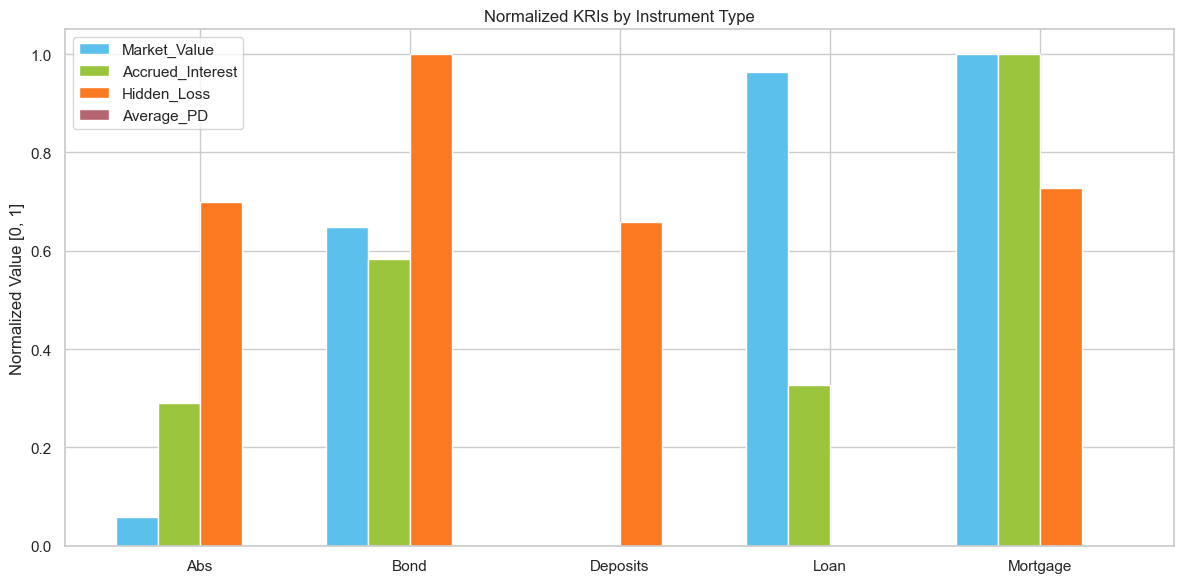

## Section 2: Cash-Flow Projection for Fixed-Coupon Instruments

**Purpose/Objective**: To project and visualize the schedule of future cash flows for a fixed-coupon instrument. This supports liquidity planning, ALM gap analysis, and Expected Credit Loss (ECL) cash-flow modeling.


### Methodology/Approach
1. **Frequency Mapping** : Map textual frequency (Annual, Semi-Annual, Quarterly) to an integer number of months.  
2. **Payment Date Generation**: Starting from start_date, step forward by the period length until maturity.  
3. **Cash-Flow Calculation**  
  $$
\mathrm{Coupon} = N \times \frac{c}{100} \times \frac{M}{12}
 $$

where, N = notional principal; c = annual coupon rate (%)  and M = months between payments  

   - **Principal**: Added in full at the final maturity date.  
4. **Cumulative Sum** : Compute the running total of cash flows to illustrate cash-flow build-up over time.



#### Summary of Key Findings

**Table: Projected Cash-Flow Schedule** : 3-year, 5% semi-annual bond (Notional €1,000,000; Start 31-Dec-2024; Maturity 31-Dec-2027)  
 

| Payment_Date | Cash_Flow (€) |
|--------------|---------------|
| 2025-06-30   |    25,000.00  |
| 2025-12-30   |    25,000.00  |
| 2026-06-30   |    25,000.00  |
| 2026-12-30   |    25,000.00  |
| 2027-06-30   |    25,000.00  |
| 2027-12-30   |    25,000.00  |
| **2027-12-31** | **1,025,000.00** |


### Interpretation/Implications
- **Regular Coupon Income:**  
  Semi-annual coupons of €25k provide predictable interest revenues, aiding P&L forecasting.  
- **Principal Repayment:**  
  The large final cash flow (€1,025k) reflects return of notional plus last coupon, critical for maturity-risk planning.  

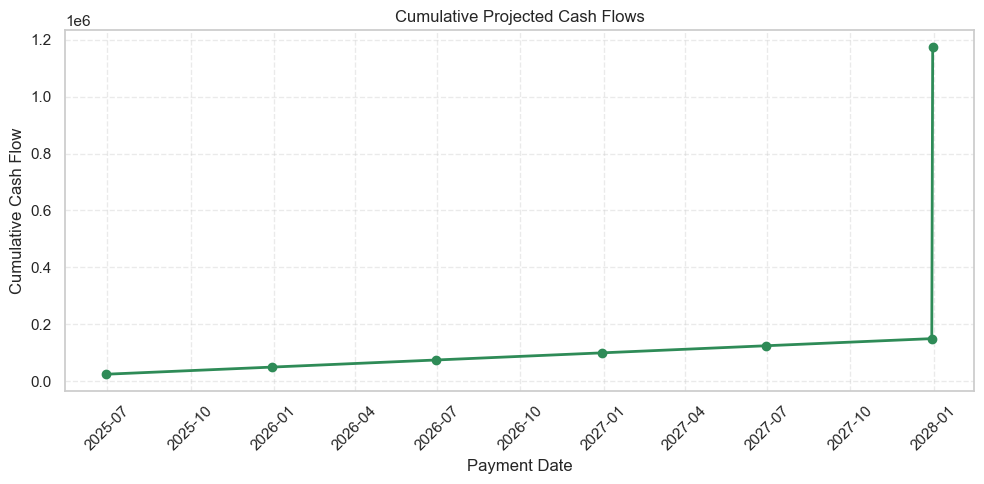

# Part C – Appendix

In [17]:
## CODE: Question 1 : KPI’s 


# Ensure proper data types (From Part A)

#get numeric variables (columns)
numeric_columns = [
    'Coupon_Margin_In_Bps', 'Current_Outstanding_Value', 'Purchase_Price',
    'Yield_At_Purchase_%', 'Book_Quote', 'Current_Coupon_%',
    'Market_Price', 'Pd', 'Lgd'
]
for col in numeric_columns:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Set valuation date
valuation_date = pd.Timestamp('2024-12-31')


# --------------------------------------- Market Value ---------------------------------------------------------------------------#
df['Market_Value'] = df['Market_Price'] * df['Current_Outstanding_Value'] / 100


# --------------------------------------- Accrued Interest (fixed coupon logic) -----------------------------------------------------------#
def calc_accrued_interest(row):
    if pd.isnull(row['Previous_Coupon_Date']) or pd.isnull(row['Next_Coupon_Date']):
        return np.nan
    days_in_period = (row['Next_Coupon_Date'] - row['Previous_Coupon_Date']).days
    if days_in_period == 0:
        return np.nan
    days_since = (valuation_date - row['Previous_Coupon_Date']).days
    if days_since < 0:
        return 0
    return (row['Current_Outstanding_Value'] *
            (row['Current_Coupon_%'] / 100) *
            (days_since / days_in_period))

df['Accrued_Interest'] = df.apply(calc_accrued_interest, axis=1)

# --------------------------------------- Hidden Losses / Reserves ---------------------------------------------------------------------------#
df['Hidden_Loss'] = (df['Book_Quote'] - df['Market_Price']) * df['Current_Outstanding_Value'] / 100



# --------------------------------------- Aggregate KPI's by Instrument Type ------------------------------------------------------------------#
agg_dict = {
    'Market_Value':      'sum',
    'Accrued_Interest':  'sum',
    'Hidden_Loss':       'sum',
    'Pd':                'mean'
}
kri = df.groupby('Instrument_Type').agg(agg_dict).rename(columns={'Pd': 'Average_PD'})


# --------------------------------------- Add-on (Market Share %) ---------------------------------------------------------------------------#
total_mv = kri['Market_Value'].sum()
kri['Market_Share_%'] = (kri['Market_Value'] / total_mv * 100).round(2)
# Convert to string with '%' suffix
kri['Market_Share_%'] = kri['Market_Share_%'].map(lambda x: f"{x:.2f}%")

# --------------------------------------- Reorder columns and round values ---------------------------------------------------------------------------#
kri_summary = kri[['Market_Value', 'Accrued_Interest', 'Hidden_Loss', 'Average_PD', 'Market_Share_%']].round(2)


# --------------------------------------- Display results ----------------------------------------------------------------#

#display(HTML("<h3>Key Risk Indicators (KPIs) by Instrument Type as of 31-Dec-2024</h3>"))
#display(kri_summary)

In [10]:
#KPI's Plot

kri_plot = kri_summary.reset_index()
kpi_cols = ['Market_Value', 'Accrued_Interest', 'Hidden_Loss', 'Average_PD']
instrument_types = kri_plot['Instrument_Type']

# Normalize for bar plot comparison
kri_norm = kri_plot.copy()
for col in kpi_cols:
    min_val = kri_plot[col].min()
    max_val = kri_plot[col].max()
    kri_norm[col] = (kri_plot[col] - min_val) / (max_val - min_val) if max_val > min_val else 0

bar_width = 0.2
ind = np.arange(len(instrument_types))
colors = ['#5bc0eb', '#9bc53d', '#fa7921', '#b4656f']

#fig, ax = plt.subplots(figsize=(12,6))
#for i, col in enumerate(kpi_cols):
#    offset = ind + i * bar_width
#    ax.bar(offset, kri_norm[col], bar_width, label=col, color=colors[i])

#ax.set_xticks(ind + bar_width * (len(kpi_cols)-1) / 2)
#ax.set_xticklabels(instrument_types)
#ax.set_title('Normalized KRIs by Instrument Type')
#ax.set_ylabel('Normalized Value [0, 1]')
#ax.legend()
#plt.tight_layout()
#plt.show()

In [18]:
# CODE: Question 2: Cash Flows

from dateutil.relativedelta import relativedelta

def project_fixed_coupon_cash_flows(
    notional, coupon_rate, frequency, start_date, maturity_date
):
    freq_map = {
        'Annual': 12,
        'Semi-Annual': 6,
        'Quarterly': 3
    }
    months = freq_map.get(frequency, 12)
    coupon_dates = []
    cash_flows = []
    curr_date = pd.Timestamp(start_date)
    while curr_date < pd.Timestamp(maturity_date):
        curr_date += relativedelta(months=months)
        if curr_date > pd.Timestamp(maturity_date):
            curr_date = pd.Timestamp(maturity_date)
        coupon_dates.append(curr_date)
        coupon_payment = notional * coupon_rate / 100 * (months / 12)
        cash_flows.append(coupon_payment)
    # Principal repayment at maturity
    if coupon_dates and coupon_dates[-1] != pd.Timestamp(maturity_date):
        coupon_dates.append(pd.Timestamp(maturity_date))
        cash_flows.append(notional)
    else:
        cash_flows[-1] += notional
    cf_df = pd.DataFrame({
        'Payment_Date': coupon_dates,
        'Cash_Flow': cash_flows
    })
    return cf_df

# Example: Project cash flows for a 3-year, 5% coupon, semi-annual bond
cf_example = project_fixed_coupon_cash_flows(
    notional=1000000,
    coupon_rate=5.0,
    frequency='Semi-Annual',
    start_date='2024-12-31',
    maturity_date='2027-12-31'
)
#display(cf_example)

In [ ]:
#plot cumulative cash flow

#Calculate cumulative cash flow
cf_example['Cumulative_Cash_Flow'] = cf_example['Cash_Flow'].cumsum()

#plt.figure(figsize=(10, 5))
#plt.plot(cf_example['Payment_Date'], cf_example['Cumulative_Cash_Flow'], marker='o', color='seagreen', linewidth=2)
#plt.title('Cumulative Projected Cash Flows')
#plt.xlabel('Payment Date')
#plt.ylabel('Cumulative Cash Flow')
#plt.xticks(rotation=45)
#plt.grid(True, linestyle='--', alpha=0.4)
#plt.tight_layout()
#plt.show()